In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LassoCV, RidgeCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
df=pd.read_csv("Admission_Prediction.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [4]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [5]:
df['TOEFL Score'].mean()

107.18775510204081

In [6]:
# pf=ProfileReport(df)
# pf.to_file("GRE.html")

In [7]:
#  df["GRE Score"]=df["GRE Score"].fillna(df["GRE Score"].mean())
df["GRE Score"].fillna(df["GRE Score"].mean(), inplace=True) #best way to fill missing values is imputation

In [8]:
 df["University Rating"]=df["University Rating"].fillna(df["University Rating"].mean())

In [9]:
 df["TOEFL Score"]=df["TOEFL Score"].fillna(df["TOEFL Score"].mean())

In [10]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128802,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [12]:
df.drop("Serial No.",axis=1, inplace=True)

In [13]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73


In [14]:
# y=df.iloc[:, -1]
y=df['Chance of Admit']
y
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73


In [42]:
# x=df.drop(columns=['Chance of Admit'])
x=df[["GRE Score"]]

In [43]:
# x=df.drop("Chance of Admit",axis=1, inplace =True)
x

,GRE Score
0,337.000000
1,324.000000
2,316.558763
3,322.000000
4,314.000000
...,...
495,332.000000
496,337.000000
497,330.000000
498,312.000000


In [44]:
scaler = StandardScaler()#better relation we use standardscaler

In [45]:
arr=scaler.fit_transform(x)

In [46]:
df1=pd.DataFrame(arr)
df1

,0
0,1.842741e+00
1,6.708143e-01
2,5.124333e-15
3,4.905178e-01
4,-2.306679e-01
...,...
495,1.392000e+00
496,1.842741e+00
497,1.211704e+00
498,-4.109644e-01


In [ ]:
# pf1=ProfileReport(df1)
# pf1.to_widgets()

In [ ]:
arr

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #regularization
vif_df = pd.DataFrame()

In [23]:
vif_df['vif']=[variance_inflation_factor(arr, i) for i in range(arr.shape[1])]

In [24]:
vif_df['feature']=x.columns

In [25]:
vif_df #vif<10

,vif,feature
0,4.153268,GRE Score
1,3.792866,TOEFL Score
2,2.508768,University Rating
3,2.775750,SOP
4,2.037308,LOR
5,4.651670,CGPA
6,1.459311,Research


In [47]:
arr

array([[ 1.84274116e+00],
       [ 6.70814288e-01],
       [ 5.12433309e-15],
       [ 4.90517846e-01],
       [-2.30667922e-01],
       [ 1.21170361e+00],
       [ 4.00369625e-01],
       [-7.71557248e-01],
       [-1.31244657e+00],
       [ 5.80666067e-01],
       [ 7.60962509e-01],
       [ 9.41258951e-01],
       [ 5.12433309e-15],
       [-8.61705469e-01],
       [-5.01112585e-01],
       [-2.30667922e-01],
       [ 3.97767408e-02],
       [ 2.20073183e-01],
       [ 1.29924962e-01],
       [-1.22229835e+00],
       [-4.10964364e-01],
       [ 7.60962509e-01],
       [ 1.03140717e+00],
       [ 5.12433309e-15],
       [ 1.75259294e+00],
       [ 2.11318582e+00],
       [ 4.90517846e-01],
       [-1.67303946e+00],
       [-1.94348412e+00],
       [-5.91260806e-01],
       [-1.49274302e+00],
       [ 9.41258951e-01],
       [ 1.93288938e+00],
       [ 2.11318582e+00],
       [ 1.30185183e+00],
       [ 3.10221404e-01],
       [ 5.12433309e-15],
       [-1.49274302e+00],
       [-1.1

In [48]:
#train test split (so that we can test on an unknown data set)
x_train, x_test, y_train, y_test=train_test_split(arr, y, test_size=0.15, random_state=90) #how much of the data set to use for testing purpose

In [49]:
x_train

array([[ 5.12433309e-15],
       [ 1.39200006e+00],
       [ 1.12155539e+00],
       [-1.67303946e+00],
       [-1.49274302e+00],
       [-4.10964364e-01],
       [-1.85333590e+00],
       [-1.04200191e+00],
       [ 2.02303760e+00],
       [-5.91260806e-01],
       [ 3.10221404e-01],
       [-6.81409027e-01],
       [-1.58289124e+00],
       [ 1.66244472e+00],
       [ 4.90517846e-01],
       [-1.22229835e+00],
       [-1.40519701e-01],
       [-7.71557248e-01],
       [-1.40259480e+00],
       [ 1.03140717e+00],
       [ 3.10221404e-01],
       [-4.10964364e-01],
       [-1.40519701e-01],
       [ 9.41258951e-01],
       [ 3.97767408e-02],
       [-1.13215013e+00],
       [ 5.80666067e-01],
       [ 6.70814288e-01],
       [-1.40519701e-01],
       [-2.03363234e+00],
       [ 1.29924962e-01],
       [ 1.12155539e+00],
       [-1.31244657e+00],
       [ 6.70814288e-01],
       [-4.10964364e-01],
       [-1.67303946e+00],
       [ 3.97767408e-02],
       [-6.81409027e-01],
       [-4.1

In [50]:
lr=LinearRegression()

In [51]:
lr.fit(x_train, y_train)

LinearRegression()

In [52]:
lr.coef_

array([0.11183243])

In [53]:
lr.intercept_

0.7228232612101668

Text(0, 0.5, 'Package(in lpa)')

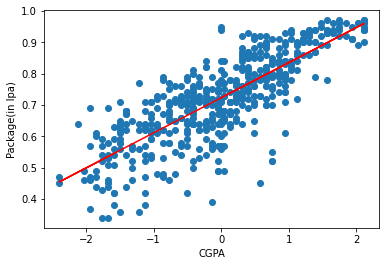

In [55]:
plt.scatter(arr,y)
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
# x.shape

In [ ]:
pickle.dump(lr,open('adm_lr_model.pickle', 'wb')) #saving model to pickle file 

In [ ]:
ls

In [ ]:
lr.predict([[324.000000,107.0,4.0,4.0,4.5,8.87,1]])

In [ ]:
df

In [ ]:
scaler.transform([[324.000000,107.0,4.0,4.0,4.5,8.87,1]])

In [ ]:
lr.predict([[ 0.67081429, -0.03105811,  0.77890565,  0.63231549,  1.09894429,
         0.48585943,  0.88640526]])

In [ ]:
model=pickle.load(open("adm_lr_model.pickle", 'rb'))

In [ ]:
model.predict([[ 0.67081429, -0.03105811,  0.77890565,  0.63231549,  1.09894429,
         0.48585943,  0.88640526]])

In [ ]:
model.score(x_test, y_test) # R^2 

In [ ]:
#for adjusted R^2
def adj_r2(x,y):
    
    r2=lr.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    
    adjr2= 1-(1-r2)*(n-1)/(n-p-1)
    return adjr2

In [ ]:
adj_r2(x_test, y_test)

In [ ]:
#change the parameters like test_size and random_state the accuracy varies


In [ ]:
lassocv=LassoCV(cv=10, max_iter=200000, normalize=True)
lassocv.fit(x_train, y_train)

In [ ]:
lassocv.alpha_

In [ ]:
lasso=Lasso(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)

In [ ]:
lasso.score(x_test, y_test)

In [ ]:
#cv >> cross validation 
#dividing data set into multiple sets and finding the best parameter
#dividing dataset into 10 parts 